# Q1 who is more influential??

Choice is the human judgement (A>B then 1), meaning if 1, A has higher influence power according to humans

**HOWEVER, how does "human judgement" reflect the real power of influece**

In [9]:
# create prediction models and choose the best model. For Q2, models that can extract feature importance are recommneded

# for details of the data, refer to the Data Description in the "part_1_eda_features_eng.ipynb"

# maybe we should scale or standardize diff_following, diff_listed, diff_mentions or do something about the outlies. 

In [1]:
import pandas as pd

df = pd.read_csv('train_v2.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, 0 to 5499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Choice                        5368 non-null   int64  
 1   diff_following_count          5368 non-null   int64  
 2   diff_listed_count             5368 non-null   int64  
 3   diff_mentions_received        5368 non-null   float64
 4   diff_retweets_received        5368 non-null   float64
 5   diff_mentions_sent            5368 non-null   float64
 6   diff_retweets_sent            5368 non-null   float64
 7   diff_posts                    5368 non-null   float64
 8   diff_network_feature_1        5368 non-null   int64  
 9   diff_network_feature_2        5368 non-null   float64
 10  diff_network_feature_3        5368 non-null   float64
 11  ratio_follower_count_A/B      5368 non-null   float64
 12  ratio_following_count_A/B     5368 non-null   float64
 13  ratio_me

In [4]:
#train split the data
from sklearn.model_selection import train_test_split
X = df.drop('Choice', axis=1)
y = df['Choice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
train = pd.concat([X_train, y_train], axis=1)

## Models

In [3]:
from pycaret.classification import *

In [7]:
clf1 = setup(data = train, target = 'Choice', session_id=123, log_experiment=True, experiment_name='influncer1')

,Description,Value
0,Session id,123
1,Target,Choice
2,Target type,Binary
3,Original data shape,"(4294, 16)"
4,Transformed data shape,"(4294, 16)"
5,Transformed train set shape,"(3005, 16)"
6,Transformed test set shape,"(1289, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7741,0.8615,0.7836,0.7773,0.7801,0.5477,0.5483,0.2400
lightgbm,Light Gradient Boosting Machine,0.7674,0.8561,0.7817,0.7681,0.7747,0.5343,0.5346,0.1710
catboost,CatBoost Classifier,0.7661,0.8596,0.7804,0.7670,0.7735,0.5317,0.5319,1.4600
ada,Ada Boost Classifier,0.7604,0.8493,0.7661,0.7666,0.7660,0.5205,0.5210,0.0590
rf,Random Forest Classifier,0.7578,0.8483,0.7641,0.7630,0.7634,0.5152,0.5155,0.1090
et,Extra Trees Classifier,0.7544,0.8348,0.7583,0.7616,0.7597,0.5086,0.5090,0.0620
xgboost,Extreme Gradient Boosting,0.7528,0.8471,0.7661,0.7549,0.7602,0.5051,0.5054,0.0600
lr,Logistic Regression,0.7351,0.7924,0.7433,0.7405,0.7417,0.4699,0.4702,0.4020
ridge,Ridge Classifier,0.7092,0.0000,0.7167,0.7158,0.7160,0.4180,0.4182,0.0070
lda,Linear Discriminant Analysis,0.7092,0.7778,0.7167,0.7158,0.7160,0.4180,0.4182,0.0080


### create models

In [9]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7641,0.8556,0.7662,0.7712,0.7687,0.5281,0.5281
1,0.7674,0.8573,0.7403,0.7917,0.7651,0.5354,0.5365
2,0.7841,0.8764,0.7662,0.8027,0.7841,0.5683,0.5690
3,0.7442,0.8413,0.7403,0.7550,0.7475,0.4883,0.4884
4,0.7708,0.8622,0.7857,0.7707,0.7781,0.5411,0.5412
5,0.7933,0.8653,0.8182,0.7875,0.8025,0.5859,0.5864
6,0.7600,0.8571,0.7987,0.7500,0.7736,0.5188,0.5200
7,0.7700,0.8455,0.7792,0.7742,0.7767,0.5396,0.5396
8,0.8067,0.8914,0.8506,0.7892,0.8188,0.6122,0.6142


In [10]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7409,0.8350,0.7532,0.7436,0.7484,0.4813,0.4813
1,0.7674,0.8592,0.7857,0.7658,0.7756,0.5343,0.5345
2,0.7874,0.8735,0.7987,0.7885,0.7935,0.5744,0.5744
3,0.7575,0.8442,0.7597,0.7647,0.7622,0.5148,0.5148
4,0.7409,0.8470,0.7338,0.7533,0.7434,0.4818,0.4819
5,0.7833,0.8698,0.7987,0.7834,0.7910,0.5661,0.5662
6,0.7633,0.8483,0.7987,0.7546,0.7760,0.5256,0.5265
7,0.7567,0.8422,0.7597,0.7647,0.7622,0.5131,0.5131
8,0.7933,0.8742,0.8247,0.7840,0.8038,0.5858,0.5866


In [11]:
ctb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7442,0.8450,0.7532,0.7484,0.7508,0.4880,0.4880
1,0.7608,0.8563,0.7597,0.7697,0.7647,0.5215,0.5215
2,0.7807,0.8719,0.7857,0.7857,0.7857,0.5612,0.5612
3,0.7608,0.8463,0.7662,0.7662,0.7662,0.5213,0.5213
4,0.7442,0.8530,0.7662,0.7421,0.7540,0.4877,0.4880
5,0.7667,0.8595,0.7857,0.7658,0.7756,0.5327,0.5329
6,0.7600,0.8539,0.7922,0.7531,0.7722,0.5190,0.5197
7,0.7700,0.8572,0.7662,0.7815,0.7738,0.5399,0.5400
8,0.8033,0.8870,0.8377,0.7914,0.8139,0.6058,0.6069


In [12]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.8179,0.7922,0.7625,0.7771,0.5342,0.5346
1,0.7110,0.7815,0.7078,0.7219,0.7148,0.4219,0.4220
2,0.7841,0.8259,0.7662,0.8027,0.7841,0.5683,0.5690
3,0.7209,0.7631,0.7143,0.7333,0.7237,0.4419,0.4421
4,0.6844,0.7611,0.6753,0.6980,0.6865,0.3689,0.3691
5,0.7133,0.7717,0.7273,0.7179,0.7226,0.4261,0.4261
6,0.7533,0.8181,0.7922,0.7439,0.7673,0.5054,0.5066
7,0.7467,0.7986,0.7532,0.7532,0.7532,0.4930,0.4930
8,0.7333,0.7959,0.7468,0.7372,0.7419,0.4661,0.4661


### Tune Hyperparameters 

In [27]:
tuned_gbc = tune_model(gbc, optimize='Accuracy', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7641,0.8518,0.7727,0.7677,0.7702,0.5279,0.5279
1,0.7807,0.8466,0.7662,0.7973,0.7815,0.5616,0.5621
2,0.7708,0.8781,0.7597,0.7852,0.7723,0.5416,0.5419
3,0.7508,0.8449,0.7727,0.7484,0.7604,0.5010,0.5013
4,0.7442,0.8449,0.7662,0.7421,0.7540,0.4877,0.4880
5,0.7767,0.8617,0.7987,0.7736,0.7859,0.5526,0.5529
6,0.7533,0.8538,0.7857,0.7469,0.7658,0.5056,0.5063
7,0.7700,0.8495,0.7987,0.7640,0.7810,0.5391,0.5397
8,0.7900,0.8905,0.8312,0.7758,0.8025,0.5789,0.5804


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
tuned_lgbm = tune_model(lgbm, optimize='Accuracy', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7575,0.8480,0.7597,0.7647,0.7622,0.5148,0.5148
1,0.7708,0.8486,0.7857,0.7707,0.7781,0.5411,0.5412
2,0.7907,0.8745,0.7987,0.7935,0.7961,0.5811,0.5811
3,0.7575,0.8342,0.7662,0.7613,0.7638,0.5146,0.5146
4,0.7442,0.8505,0.7532,0.7484,0.7508,0.4880,0.4880
5,0.7733,0.8581,0.7987,0.7688,0.7834,0.5459,0.5463
6,0.7767,0.8543,0.8052,0.7702,0.7873,0.5525,0.5531
7,0.7600,0.8489,0.7727,0.7628,0.7677,0.5195,0.5195
8,0.7800,0.8726,0.7987,0.7785,0.7885,0.5594,0.5596


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [65]:
tuned_ctb = tune_model(ctb, optimize='Accuracy', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7608,0.8489,0.7597,0.7697,0.7647,0.5215,0.5215
1,0.7708,0.8533,0.7857,0.7707,0.7781,0.5411,0.5412
2,0.7841,0.8697,0.7857,0.7908,0.7883,0.5679,0.5680
3,0.7542,0.8386,0.7662,0.7564,0.7613,0.5079,0.5079
4,0.7641,0.8664,0.7792,0.7643,0.7717,0.5278,0.5279
5,0.7633,0.8533,0.7857,0.7610,0.7732,0.5259,0.5262
6,0.7567,0.8563,0.7857,0.7516,0.7683,0.5124,0.5129
7,0.7733,0.8473,0.7792,0.7792,0.7792,0.5463,0.5463
8,0.7900,0.8810,0.8312,0.7758,0.8025,0.5789,0.5804


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
tuned_lr = tune_model(lr, optimize='Accuracy', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.8188,0.7922,0.7625,0.7771,0.5342,0.5346
1,0.7143,0.7849,0.7078,0.7267,0.7171,0.4286,0.4288
2,0.7807,0.8240,0.7662,0.7973,0.7815,0.5616,0.5621
3,0.7309,0.7687,0.7143,0.7483,0.7309,0.4621,0.4626
4,0.6844,0.7607,0.6753,0.6980,0.6865,0.3689,0.3691
5,0.7033,0.7746,0.7208,0.7070,0.7138,0.4059,0.4060
6,0.7567,0.8190,0.7922,0.7485,0.7697,0.5122,0.5131
7,0.7533,0.7965,0.7662,0.7564,0.7613,0.5061,0.5062
8,0.7467,0.7985,0.7532,0.7532,0.7532,0.4930,0.4930


Fitting 10 folds for each of 10 candidates, totalling 100 fits


best models - `[gbc (better performance than taned), tuned_lgbm, tuned_ctb, tuned_lr]`

In [72]:
# blend the models
blender = blend_models(estimator_list = [gbc, tuned_lgbm, tuned_ctb], method = 'soft', optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7542,0.8541,0.7532,0.7632,0.7582,0.5082,0.5082
1,0.7708,0.8571,0.7792,0.7742,0.7767,0.5412,0.5412
2,0.7841,0.8791,0.7857,0.7908,0.7883,0.5679,0.5680
3,0.7475,0.8425,0.7468,0.7566,0.7516,0.4949,0.4949
4,0.7774,0.8638,0.8052,0.7702,0.7873,0.5541,0.5547
5,0.7733,0.8627,0.7987,0.7688,0.7834,0.5459,0.5463
6,0.7733,0.8587,0.7987,0.7688,0.7834,0.5459,0.5463
7,0.7700,0.8520,0.7857,0.7707,0.7781,0.5394,0.5395
8,0.7967,0.8859,0.8377,0.7818,0.8088,0.5922,0.5939


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [73]:
# stack the models
stacker = stack_models(estimator_list=[gbc, tuned_lgbm], meta_model=tuned_ctb, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7641,0.8468,0.7922,0.7578,0.7746,0.5275,0.5280
1,0.7841,0.8584,0.7922,0.7871,0.7896,0.5678,0.5678
2,0.7708,0.8601,0.7987,0.7640,0.7810,0.5408,0.5414
3,0.7508,0.8441,0.7922,0.7394,0.7649,0.5005,0.5019
4,0.7442,0.8488,0.7792,0.7362,0.7571,0.4874,0.4883
5,0.7800,0.8617,0.8052,0.7750,0.7898,0.5592,0.5597
6,0.7567,0.8538,0.8247,0.7341,0.7768,0.5113,0.5155
7,0.7767,0.8517,0.7922,0.7771,0.7846,0.5528,0.5529
8,0.7967,0.8919,0.8506,0.7751,0.8111,0.5920,0.5950


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


Those two models has lower accuracy than the base gbc model, thus abandoned

### final models 

In [29]:
plot_model(gbc, plot="parameter")

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1


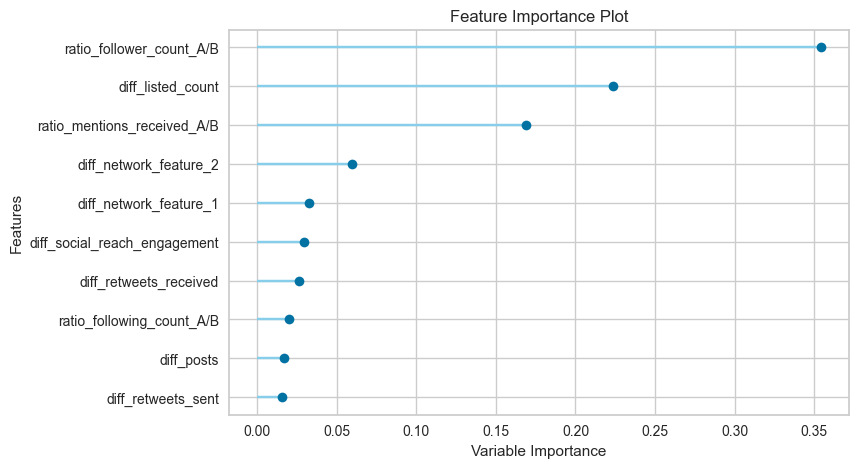

In [49]:
plot_model(gbc, plot='feature')

In [30]:
plot_model(tuned_lgbm, plot="parameter")

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,41
min_child_weight,0.001
min_split_gain,0.9
n_estimators,260


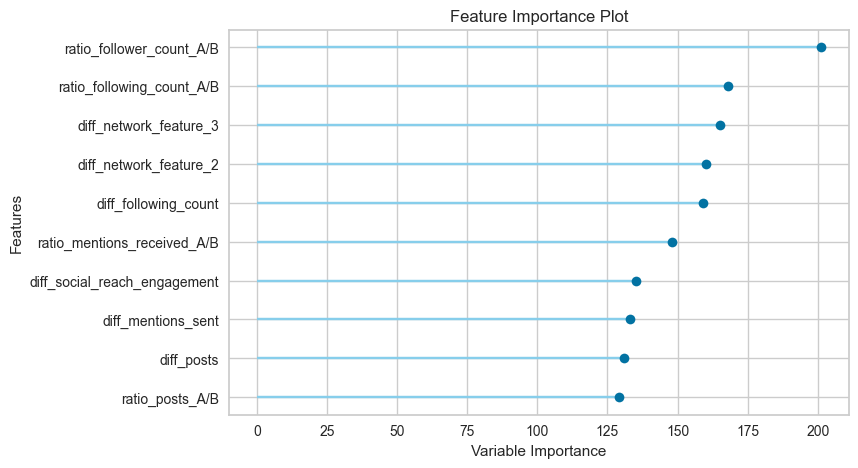

In [51]:
plot_model(tuned_lgbm, plot='feature')

In [31]:
plot_model(tuned_ctb, plot="parameter")

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,250
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


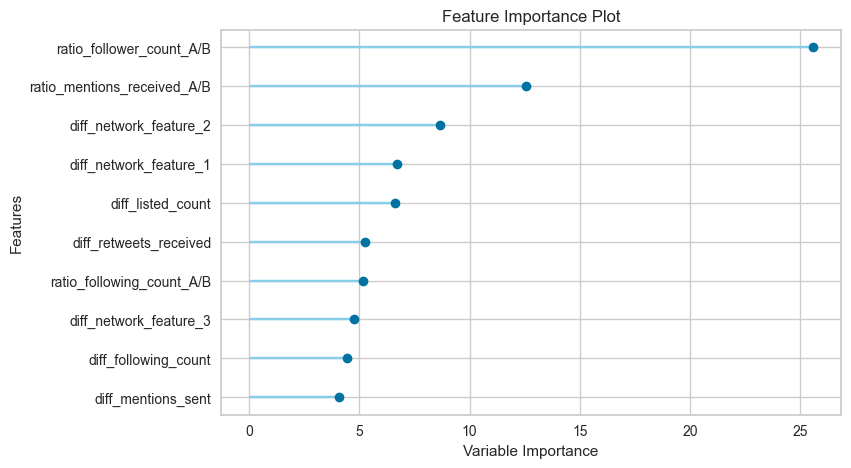

In [52]:
plot_model(tuned_ctb, plot='feature')

In [32]:
plot_model(tuned_lr, plot="parameter")

,Parameters
C,7.689
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [54]:
coefficients = tuned_lr.coef_[0]
features = X_train.columns  
lr_feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
lr_feature_importance = lr_feature_importance.sort_values(by='Importance', ascending=False)

print(lr_feature_importance)

                         Feature    Importance
10      ratio_follower_count_A/B  1.926831e-04
1              diff_listed_count  9.090214e-05
9         diff_network_feature_3  3.743354e-05
7         diff_network_feature_1  3.463827e-05
12   ratio_mentions_received_A/B  2.040013e-05
2         diff_mentions_received  1.470874e-05
8         diff_network_feature_2  1.303709e-05
13               ratio_posts_A/B  8.468705e-06
6                     diff_posts  3.416253e-06
4             diff_mentions_sent  3.080636e-06
0           diff_following_count  5.726799e-07
5             diff_retweets_sent  5.450403e-07
11     ratio_following_count_A/B  4.824590e-11
14  diff_social_reach_engagement -1.128218e-05
3         diff_retweets_received -2.149341e-04


In [79]:
save_model(gbc, 'final_gbc')

save_model(tuned_lgbm, 'final_lgbm')

save_model(tuned_ctb, 'final_ctb')

save_model(tuned_lr, 'final_lr')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['diff_following_count',
                                              'diff_listed_count',
                                              'diff_mentions_received',
                                              'diff_retweets_received',
                                              'diff_mentions_sent',
                                              'diff_retweets_sent', 'diff_posts',
                                              'diff_network_feature_1',
                                              'diff_network_feature_2',
                                              'diff_network_feature_3',
                                              'ratio_follower_coun...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\

### Model Evaluation

In [80]:
gbc_model = load_model('final_gbc')
lgbm_model = load_model('final_lgbm')
ctb_model = load_model('final_ctb')
lr_model = load_model('final_lr')

predictions_gbc = predict_model(gbc_model, data=X_test)
predictions_lgbm = predict_model(lgbm_model, data=X_test)
predictions_ctb = predict_model(ctb_model, data=X_test)
predictions_lr = predict_model(lr_model, data=X_test)

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [88]:
accuracy_gbc = accuracy_score(y_test, predictions_gbc['prediction_label'])
conf_matrix_gbc = confusion_matrix(y_test, predictions_gbc['prediction_label'])
print(f"GBC Model Accuracy: {accuracy_gbc}")
print(f"GBC Model Confusion Matrix:\n{conf_matrix_gbc}\n")

GBC Model Accuracy: 0.7728119180633147
GBC Model Confusion Matrix:
[[408 129]
 [115 422]]



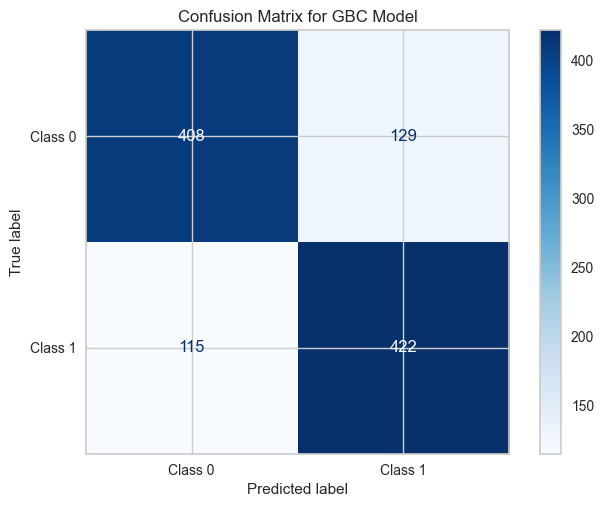

In [96]:
ConfusionMatrixDisplay.from_estimator(gbc_model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.title('Confusion Matrix for GBC Model')
plt.show()

In [89]:
accuracy_lgbm = accuracy_score(y_test, predictions_lgbm['prediction_label'])
conf_matrix_lgbm = confusion_matrix(y_test, predictions_lgbm['prediction_label'])
print(f"LGBM Model Accuracy: {accuracy_lgbm}")
print(f"LGBM Model Confusion Matrix:\n{conf_matrix_lgbm}\n")

LGBM Model Accuracy: 0.7681564245810056
LGBM Model Confusion Matrix:
[[412 125]
 [124 413]]



[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


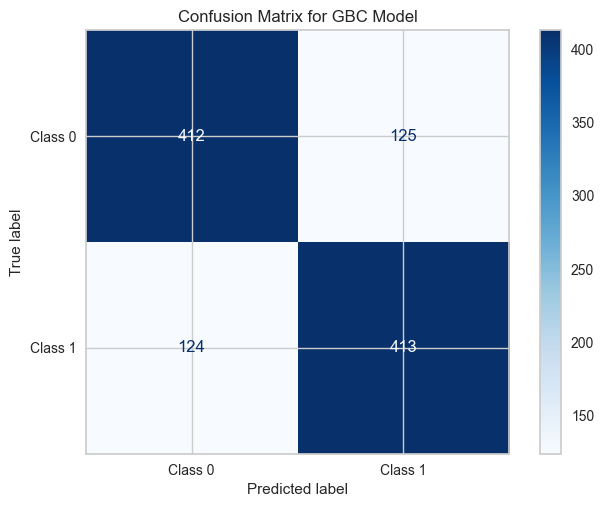

In [97]:
ConfusionMatrixDisplay.from_estimator(lgbm_model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.title('Confusion Matrix for GBC Model')
plt.show()

In [90]:
accuracy_ctb = accuracy_score(y_test, predictions_ctb['prediction_label'])
conf_matrix_ctb = confusion_matrix(y_test, predictions_ctb['prediction_label'])
print(f"CTB Model Accuracy: {accuracy_ctb}")
print(f"CTB Model Confusion Matrix:\n{conf_matrix_ctb}\n")

CTB Model Accuracy: 0.7728119180633147
CTB Model Confusion Matrix:
[[415 122]
 [122 415]]



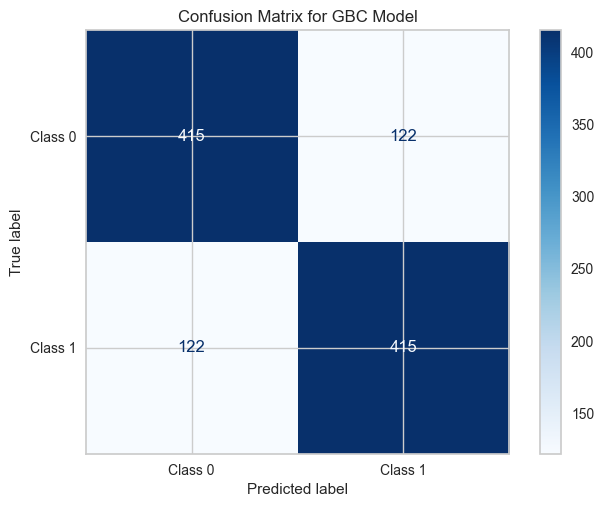

In [98]:
ConfusionMatrixDisplay.from_estimator(ctb_model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.title('Confusion Matrix for GBC Model')
plt.show()

In [91]:
accuracy_lr = accuracy_score(y_test, predictions_lr['prediction_label'])
conf_matrix_lr = confusion_matrix(y_test, predictions_lr['prediction_label'])
print(f"LR Model Accuracy: {accuracy_lr}")
print(f"LR Model Confusion Matrix:\n{conf_matrix_lr}\n")

LR Model Accuracy: 0.7420856610800745
LR Model Confusion Matrix:
[[401 136]
 [141 396]]



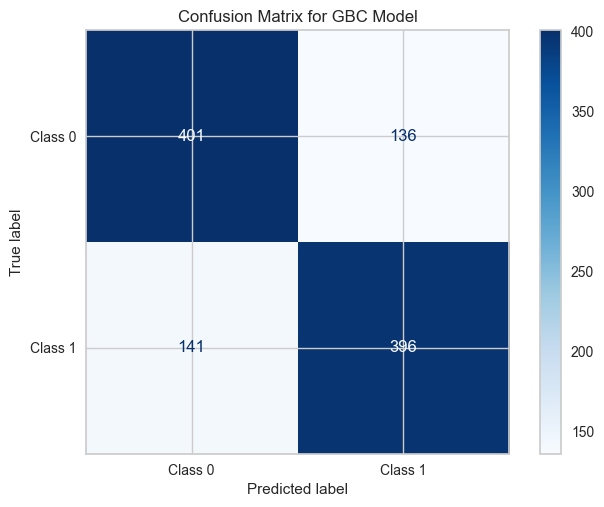

In [99]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')
plt.title('Confusion Matrix for GBC Model')
plt.show()

# Q2 which factors are the best predictors of influence?

# Q3 Report the confusion matrix of your “best” model

# Q4 Are there any surprises here? How can a business use your model/results?

> what exactly are network features 1,2,3? 